In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
# 데이터 불러오기 
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin','carname']

df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?')

/var/folders/nr/9d9y7mfn50b3sc_ncv28vstc0000gn/T/ipykernel_1796/1452076898.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?')


In [5]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [7]:
# 컬렴명 확인
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'carname'],
      dtype='object')

In [9]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   carname       398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [11]:
df = df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   carname       392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>],
       [<Axes: title={'center': 'model year'}>,
        <Axes: title={'center': 'origin'}>, <Axes: >]], dtype=object)

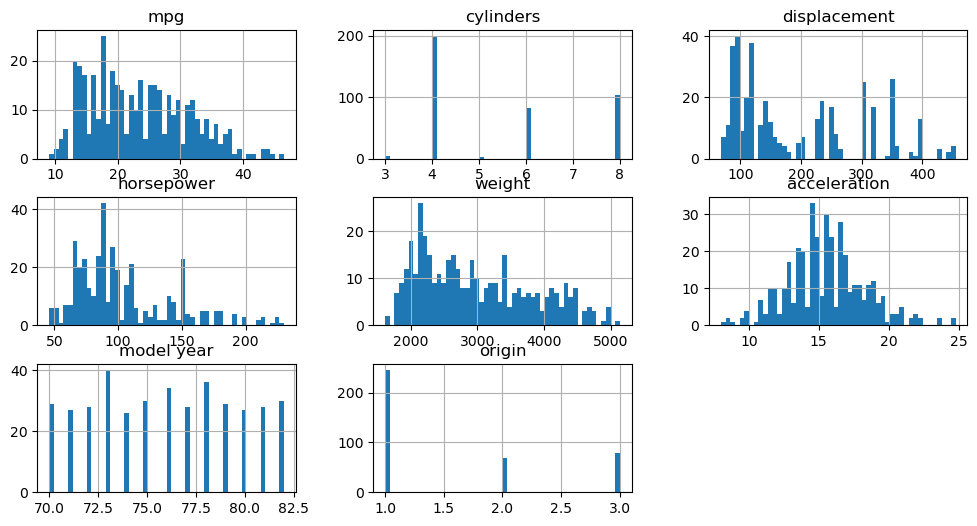

In [15]:
df.hist(bins=50,figsize=(12,6))

In [19]:
# 레이블 갯수 확인 (carname -> 너무 다양함, 추후 삭제)
df['carname'].value_counts()

carname
amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: count, Length: 301, dtype: int64

In [21]:
# -> 0관련 결측치 존재 X
(df==0).sum() 

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
carname         0
dtype: int64

In [25]:
df = df.drop('carname', axis=1)

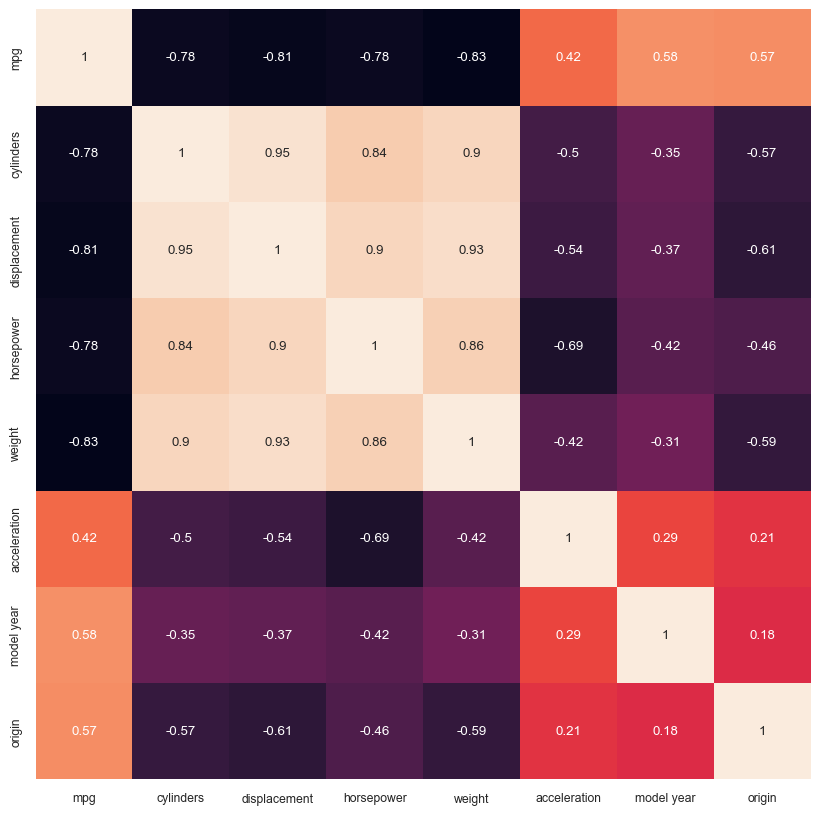

In [27]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [133]:
# split sequence 함수 사용 
from collections import Counter

def split_sequence(df, n_steps):
    X,y = [], []
    for i in range(len(df)-n_steps): # n_step 길이만큼의 입력 시퀀스 
        # 시퀀스의 끝 계산
        end_ix = i + n_steps
        # 끝이 시퀀스 범위를 넘는지 확인
        if end_ix > len(df) - 1:
            break
        # 입력과 출력 시퀀스 나누기
        seq_x = df.iloc[i:end_ix, :-1]  # 마지막 열 제외
        seq_y = Counter(df.iloc[i:end_ix, -1]).most_common(1)[0][0]  # 마지막 열에서 가장 많이 등장하는 값
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# n_steps 설정
n_steps = 6

# 시퀀스 분할 적용
X, y = split_sequence(df, n_steps)


In [147]:
# 결과 확인
print("입력 데이터 (X):", X)
print("출력 데이터 (y):", y)

입력 데이터 (X): [[  8.  307.  130.  ...  12.   70.    1. ]
 [  8.  350.  165.  ...  11.5  70.    1. ]
 [  8.  318.  150.  ...  11.   70.    1. ]
 ...
 [  4.  135.   84.  ...  11.6  82.    1. ]
 [  4.  120.   79.  ...  18.6  82.    1. ]
 [  4.  119.   82.  ...  19.4  82.    1. ]]
출력 데이터 (y): [18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
 24.  22.  18.  21.  27.  26.  25.  24.  25.  26.  21.  10.  10.  11.
  9.  27.  28.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.  12.
 13.  13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.  26.
 24.  25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.  13.
 19.  15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.  27.
 13.  14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13.  18.  16.
 18.  18.  23.  26.  11.  12.  13.  12.  18.  20.  21.  22.  18.  19.
 21.  26.  15.  16.  29.  24.  20.  19.  15.  24.  20.  11.  20.  19.
 15.  31.  26.  32.  25.  16.  16.  18.  16.  13.  14.  14.  14.  29.
 26.  26.  3

In [149]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((246, 6, 7), (78, 6, 7), (246,), (78,), (62, 6, 7), (62,))

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense,Flatten

# 특성 및 타겟 분리
X = df.drop('mpg', axis=1).values
y = df['mpg'].values

# 타겟 정규화 (MinMaxScaler 사용)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# 특성 데이터 스케일링 (StandardScaler 사용)
scaler_X = StandardScaler()
scaler_X.fit_transform(X)

array([[ 1.48394702,  1.07728956,  0.66413273, ..., -1.285258  ,
        -1.62531533, -0.71664105],
       [ 1.48394702,  1.48873169,  1.57459447, ..., -1.46672362,
        -1.62531533, -0.71664105],
       [ 1.48394702,  1.1825422 ,  1.18439658, ..., -1.64818924,
        -1.62531533, -0.71664105],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, ..., -1.4304305 ,
         1.63640964, -0.71664105],
       [-0.86401356, -0.7120053 , -0.66254009, ...,  1.11008813,
         1.63640964, -0.71664105],
       [-0.86401356, -0.72157372, -0.58450051, ...,  1.40043312,
         1.63640964, -0.71664105]])

In [139]:
# 모델 구축
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))  # 중간 Dense 레이어
model.add(Dense(1, activation='linear'))  # 출력 레이어, 회귀를 위한 'linear' 활성화 함수

# 모델 컴파일
model.compile(optimizer='adam',loss='mse', metrics=['mse'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [141]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 19894.2305 - mse: 19894.2305 - val_loss: 6247.0444 - val_mse: 6247.0444
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7562.4243 - mse: 7562.4243 - val_loss: 4508.5869 - val_mse: 4508.5869
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3829.1304 - mse: 3829.1304 - val_loss: 2870.6094 - val_mse: 2870.6094
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1816.8934 - mse: 1816.8934 - val_loss: 1284.2922 - val_mse: 1284.2922
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 737.7708 - mse: 737.7708 - val_loss: 655.1328 - val_mse: 655.1328
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 414.3736 - mse: 414.3736 - val_loss: 326.2440 - val_mse: 326.2440
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 265.7548 - mse: 265.7548 - val_loss: 228.2831 - val_mse: 228.2831
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 288.2186 - mse: 288.2186 - val_loss: 214.6284 - val_mse: 214.6284
Epoch

In [143]:
# 모델 평가
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss(mse): {loss}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28.8131 - mse: 28.8131 
Test Loss(mse): 27.862455368041992
